In [5]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [6]:
sns.set(
    font_scale =2,
    style      ="whitegrid",
    rc         ={'figure.figsize':(20,7)}
)

## Анализ и подготовка исходных данных

### Считывание данных, анализ основных характеристик

In [7]:
olist_customers_datase = pd.read_csv('olist_customers_dataset.csv')
olist_order_items_dataset = pd.read_csv('olist_order_items_dataset.csv')
olist_orders_dataset = pd.read_csv('olist_orders_dataset.csv')

In [8]:
olist_customers_datase.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [9]:
olist_customers_datase.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [10]:
olist_order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [11]:
olist_order_items_dataset.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [12]:
olist_orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [13]:
olist_orders_dataset.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Text(0, 0.5, 'Purchases count')

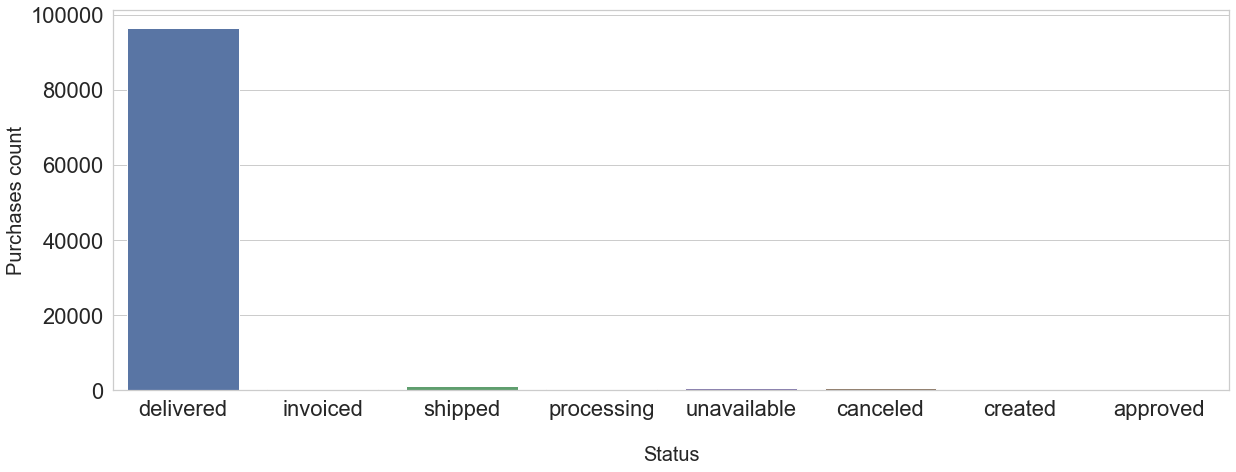

In [14]:
ax = sns.countplot(data=olist_orders_dataset, x="order_status")
ax.set_xlabel("\nStatus", fontsize = 20)
ax.set_ylabel("Purchases count", fontsize = 20)

In [15]:
olist_orders_dataset.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Удалять пустые ячейки не будем, так как они информативны и отражают изменения статусов заказов.

### Предобработка данных. Преобразование типов

In [16]:
olist_orders_dataset.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [17]:
olist_orders_dataset['order_purchase_timestamp'] = pd.to_datetime(olist_orders_dataset['order_purchase_timestamp'])
olist_orders_dataset['order_approved_at'] = pd.to_datetime(olist_orders_dataset['order_approved_at'])
olist_orders_dataset['order_delivered_carrier_date'] = pd.to_datetime(olist_orders_dataset['order_delivered_carrier_date'])
olist_orders_dataset['order_delivered_customer_date'] = pd.to_datetime(olist_orders_dataset['order_delivered_customer_date'])
olist_orders_dataset['order_estimated_delivery_date'] = pd.to_datetime(olist_orders_dataset['order_estimated_delivery_date'])

In [18]:
olist_orders_dataset.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [19]:
olist_order_items_dataset['shipping_limit_date'] = pd.to_datetime(olist_order_items_dataset['shipping_limit_date'])

## Расчет основных метрик

Покупкой в работе будем считать заказы имеющие следующие статусы: approved, invoiced, processing, shipped, delivered, unavailable, canceled.
Заказ можно считать совершенным только после проверки системой, таким образом убираем из расчета случайные заказы и ошибки пользователя.
В качестве даты покупки будем учитывать дату создания заказа покупателем для лучшего понимания поведения пользователей. 
Эти данные могут нам дать информацию, например, о том в какие дни отгружать больше товара на склад или проводить рекламные компании

### 1. Сколько у нас пользователей, которые совершили покупку только один раз?

Для расчета статистик по заказам используем заказы со статусом "delivered". Потому что только после выставления этого статуса обязанности и со стороны продавца, и со стороны покупателя будут исполнены. Заказы без оплаты и без доставки не считатся завершенными

In [20]:
#Отфильтруем только доставленные заказы
orders = olist_orders_dataset.query("order_status == 'delivered'")
#Объединим таблицы чтобы получить соответствие уникального id покупателя с заказом
full_order_customers_df = olist_orders_dataset.merge(olist_customers_datase, on='customer_id')
#Группируем по пользователю и ститаем сколько заказов сделал каждый пользователь
customers_purshases_count = full_order_customers_df.groupby('customer_unique_id')\
    .agg({'order_id': 'count'})\
        .rename(columns={'order_id': 'order_count'})\
            .sort_values('order_count', ascending= False)\
                .query("order_count == 1").shape[0]
percent = round(customers_purshases_count/full_order_customers_df.customer_unique_id.nunique()*100, 2)
print('Пользователей, которые совершили покупку только один раз '+ str(customers_purshases_count) + ', что составляет примерно '+ str(percent)+'% от общего числа пользователей')


Пользователей, которые совершили покупку только один раз 93099, что составляет примерно 96.88% от общего числа пользователей


Пользователей, которые совершили покупку только один раз 93099 

### 2. Сколько заказов в месяц в среднем не доставляется по разным причинам?

In [21]:
#Подготовим датафрейм для анализа
not_delivered = olist_orders_dataset[olist_orders_dataset.order_status !='delivered']
not_delivered = not_delivered[['order_id','customer_id', 'order_status', 'order_purchase_timestamp']]

In [22]:
#Определим сколько заказов не было доставлено пользователям за весь отчетный период
not_delivered.groupby('order_status', as_index= False)\
    .agg({'order_id': 'count'})\
        .rename(columns={'order_id': 'order_count'})\
            .sort_values('order_count', ascending= False)


,order_status,order_count
5,shipped,1107
1,canceled,625
6,unavailable,609
3,invoiced,314
4,processing,301
2,created,5
0,approved,2


По данным аналитики 2963 заказов не доехали до пользователя, из которых 314 не были оплачены.

In [23]:
not_delivered.reset_index()
#Добавим столбец с месяцем покупки
not_delivered['purchase_month'] = not_delivered.order_purchase_timestamp.apply(lambda x: x.strftime('%Y-%m'))
not_delivered_month_mean = not_delivered.groupby(['purchase_month'], as_index=False)\
    .agg({'customer_id':'count'})\
        ['customer_id'].mean()
print('В среднем не было доставлено '+ str(round(not_delivered_month_mean, 2)) + ' заказов в месяц')

В среднем не было доставлено 123.46 заказов в месяц


In [24]:
#Построим таблицу зависимости количества отмененных заказов от статуса заказа
not_delivered_pivot = not_delivered.groupby(['purchase_month', 'order_status'])\
    .agg({'customer_id':'count'})\
        .rename(columns={'customer_id': 'customer_count'})\
            .reset_index()\
                .pivot(index = 'purchase_month', columns='order_status', values = 'customer_count')
not_delivered_pivot

order_status,approved,canceled,created,invoiced,processing,shipped,unavailable
purchase_month,,,,,,,
2016-09,NaN,2.0,NaN,NaN,NaN,1.0,NaN
2016-10,NaN,24.0,NaN,18.0,2.0,8.0,7.0
2017-01,NaN,3.0,NaN,12.0,9.0,16.0,10.0
2017-02,1.0,17.0,NaN,11.0,32.0,21.0,45.0
2017-03,NaN,33.0,NaN,3.0,23.0,45.0,32.0
2017-04,1.0,18.0,NaN,14.0,10.0,49.0,9.0
2017-05,NaN,29.0,NaN,16.0,23.0,55.0,31.0
2017-06,NaN,16.0,NaN,11.0,12.0,47.0,24.0
2017-07,NaN,28.0,NaN,7.0,11.0,56.0,52.0


Text(0.5, 1.0, 'Not delivered orders')

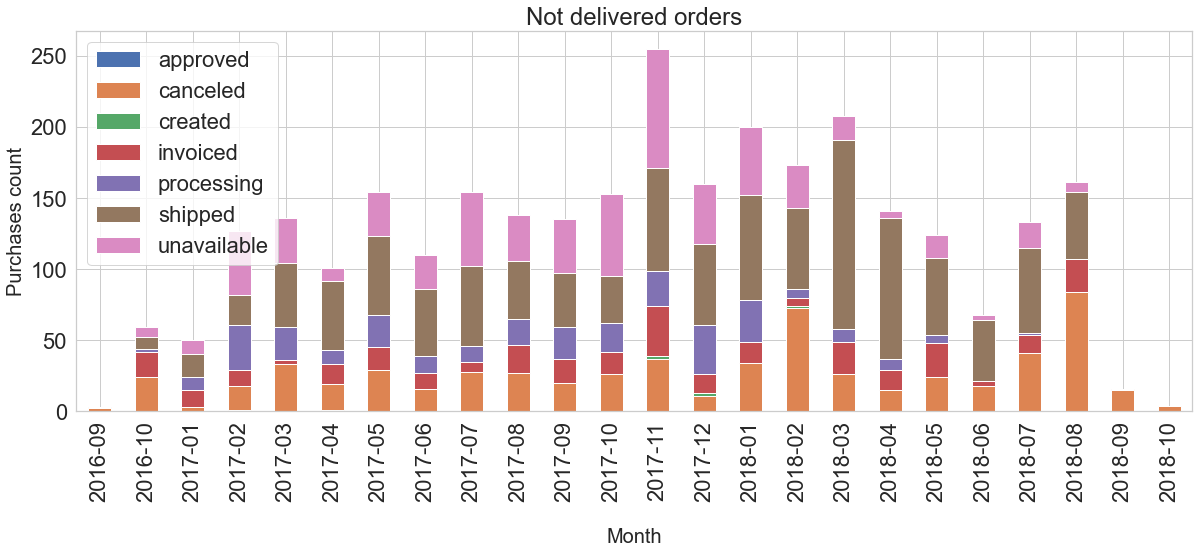

In [25]:
pt = not_delivered_pivot.plot(kind='bar', stacked=True)
pt.set_xlabel("\nMonth", fontsize = 20)
pt.set_ylabel("Purchases count", fontsize = 20)
pt.legend().set_title('')
pt.set_title('Not delivered orders')

In [26]:
#Рассчитаем количество заказов в месяц с каждым статусом
not_delivered_category_mean = not_delivered.groupby(['purchase_month', 'order_status'], as_index=False)\
    .agg({'customer_id':'count'})\
        .rename(columns={'customer_id': 'customer_count'})
#Рассчитаем среднее количество заказов в месяц для каждого статуса
not_delivered_category_mean = not_delivered_category_mean.groupby('order_status', as_index = False).agg({'customer_count':'mean'}).sort_values('customer_count', ascending = False)
not_delivered_category_mean

,order_status,customer_count
5,shipped,48.130435
6,unavailable,29.000000
1,canceled,26.041667
4,processing,15.842105
3,invoiced,14.952381
2,created,1.666667
0,approved,1.000000


Text(0.5, 1.0, '\nNot delivered orders in month\n')

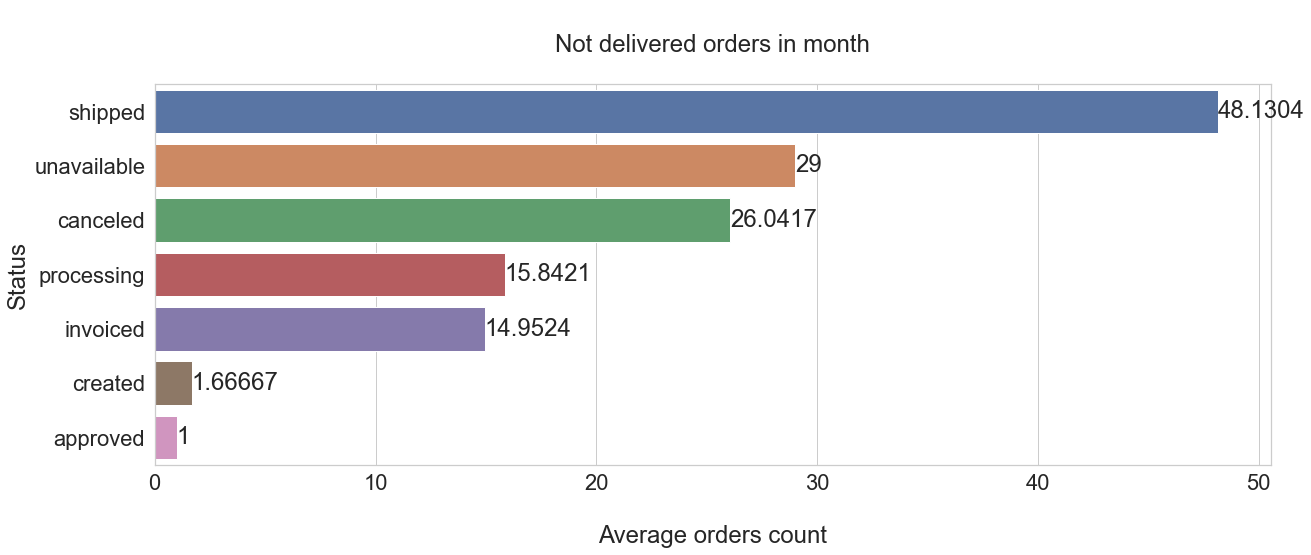

In [27]:
ax = sns.barplot(x="customer_count", y="order_status", data=not_delivered_category_mean)
ax.bar_label(ax.containers[0])
ax.set_xlabel("\nAverage orders count")
ax.set_ylabel("Status")
ax.set_title("\nNot delivered orders in month\n")

Большая часть не доставленных заказов была передана в доставку, но не доехала до пользователя. Возможно есть проблемы с логистической компанией или процедурой подтверждения доставки. 

На втором месте по причинам не завершенности сделки является недоступность товара. Стоит проводить сверку актуальности товаров. 

На третьем месте по количеству заказов находятся заказы, отмененные пользователем. Необходимо выяснить процессы по сбору обратной связи от клиентов при отмене заказов.

### 3. В какой день недели товар чаще всего покупается.

In [28]:
#Подготовим датафрейм для анализа
orders = olist_orders_dataset[olist_orders_dataset.order_status != 'created']
weekday = olist_order_items_dataset[['order_id', 'product_id']].merge(orders, how= 'left')
weekday = weekday[['order_id', 'product_id', 'order_status', 'order_purchase_timestamp']]

In [29]:
#Добавим столбец с днем недели каждого товара
weekday['weekday'] = weekday.order_purchase_timestamp.dt.day_name()
#Рассчитаем количество заказов каждого товара по дням недели
product_weekday_count = weekday.groupby(['product_id', 'weekday'], as_index= False)\
    .agg({'order_status':'count'})\
        .rename(columns={'order_status':'weekday_count'})\
            .sort_values(['product_id', 'weekday_count'], ascending=False)
#Отфильтруем только самый популярный день недели у каждого товара
product_weekday_top = product_weekday_count.groupby('product_id', as_index = False).head(1)
#Сортируем датафрейм по колиеству заказов в день недели
product_weekday_top.sort_values('weekday_count', ascending=False)

,product_id,weekday,weekday_count
15902,422879e10f46682990de24d770e7f83d,Wednesday,93
36513,99a4788cb24856965c36a24e339b6058,Monday,92
41045,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
20127,53b36df67ebb7c41585e8d54d6772e08,Tuesday,76
13537,389d119b48cf3043d311335e499d9c6b,Thursday,67
...,...,...,...
37465,9d3df566a74fbf502fb8badaa5044e74,Friday,1
37467,9d40080a29872ddbfe64f036de4ccdd1,Thursday,1
37469,9d47dddcc5eb825534e212b1b927385f,Monday,1
37470,9d489ab920498d03a7eb2c70866e5982,Monday,1


Определили в какой день недели товар покупается чаще всего, эту информацию можно передать в отдел закупок для оптимизации поставок на склады. Если бы были категории товаров, то можно было провести анализ покупаемости каждой категории и использовать эту информацию для более эффективной рекламы по дням недели

### 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?

In [30]:
#Подготовим датафрейм для анализа
orders = olist_orders_dataset[olist_orders_dataset.order_status != 'created']
customer_per_week = orders.merge(olist_customers_datase, how = 'left', on= 'customer_id')
customer_per_week = customer_per_week[['order_id', 'customer_unique_id', 'order_purchase_timestamp']]

In [31]:
#Создадим новые столбцы для фильтрации по месяцам
customer_per_week['year'] = customer_per_week.order_purchase_timestamp.dt.year
customer_per_week['month'] = customer_per_week.order_purchase_timestamp.dt.month_name()
customer_per_week['day_in_month'] = customer_per_week.order_purchase_timestamp.dt.days_in_month
#Рассчитаем количество недель в месяце
customer_per_week['week_per_month'] = customer_per_week['day_in_month']/7

In [32]:
#Рассчитаем количество покупок каждого пользователя в месяц
customer_purchases_month = customer_per_week.groupby(['customer_unique_id', 'year', 'month'], as_index=False)\
    .agg({'order_id':'count', 'week_per_month' : 'mean'})\
        .rename(columns = {'order_id': 'purchases_in_month'})
#Среднее число покупок в неделю это число покупок в месяц деленное на число недель
customer_purchases_month['purchases_in_week'] = customer_purchases_month.purchases_in_month/customer_purchases_month.week_per_month

In [33]:
#Уберем лишние поля и остортируем данные
customer_purchases_per_week = customer_purchases_month[['customer_unique_id', 'year', 'month', 'purchases_in_week']]
customer_purchases_per_week.sort_values('purchases_in_week', ascending=False).head()

,customer_unique_id,year,month,purchases_in_week
7324,12f5d6e1cbf93dafd9dcc19095df0b3d,2017,January,1.354839
69391,b4e4f24de1e8725b74e4a1f4975116ed,2018,February,1.000000
62191,a239b8e2fbce33780f1f1912e2ee5275,2017,February,1.000000
23938,3e43e6105506432c953e165fb2acf44c,2018,February,1.000000
67750,b08fab27d47a1eb6deda07bfd965ad43,2017,September,0.933333


Из полученных данных видно что пользователи покупаю товары единожды, но при этом есть единичные пользователи, которые покупают товары 4 и более раз в месяц.

### 5. Когортный анализ пользователей. Когорта с самым высоким retention на 3й месяц в период с января по декабрь. 

In [34]:
#Подготовим датафрейм для анализа
orders = olist_orders_dataset[olist_orders_dataset.order_status != 'created']
#orders = olist_orders_dataset
cohort = orders.merge(olist_customers_datase, how= 'left', on='customer_id')
cohort = cohort[['customer_unique_id', 'order_purchase_timestamp']]
#Для расчета retention нужны пользователи, совершившие больше одного заказа
#cohort = cohort[cohort['customer_unique_id'].map(cohort['customer_unique_id'].value_counts()) > 1]
#Для анализа используем период с 1 января 2017 года по 1 января 2018 года
cohort = cohort[(cohort['order_purchase_timestamp']>= pd.Timestamp(2017,1,1)) & (cohort['order_purchase_timestamp']< pd.Timestamp(2018,1,1))]


<AxesSubplot:xlabel='order_purchase_timestamp', ylabel='Count'>

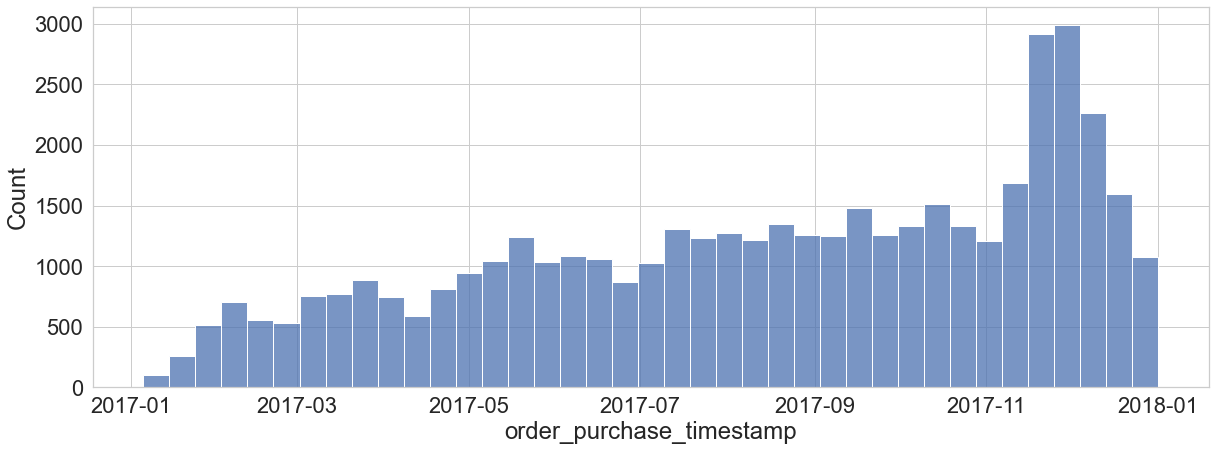

In [35]:
#Расределение заказов в заданный период выглядит следующим образом
sns.histplot(data = cohort, x='order_purchase_timestamp')

In [36]:
cohort.head()

,customer_unique_id,order_purchase_timestamp
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06
5,80bb27c7c16e8f973207a5086ab329e2,2017-07-09 21:57:05
6,36edbb3fb164b1f16485364b6fb04c73,2017-04-11 12:22:08
7,932afa1e708222e5821dac9cd5db4cae,2017-05-16 13:10:30


In [37]:
#Выделяем в какой месяц был сделан заказ
cohort['order_purchase_month'] = cohort.order_purchase_timestamp.apply(lambda x: x.strftime('%Y-%m'))
cohort.set_index('customer_unique_id', inplace=True)
#Рассчитываем в каком месяце пользователь впервые сделал заказ
cohort['First_Month'] = cohort.groupby(level=0)['order_purchase_timestamp'].min().apply(lambda x: x.strftime('%Y-%m'))
#Добавим столбец для дальшейшего расчета количества заказов
cohort.reset_index(inplace=True)
cohort.insert(len(cohort.columns), "TotalOrders", 0, allow_duplicates=False)

In [38]:
#Выделим когорты по месяцу первой покупки и рассчитаем сколько сделано заказов в следующие месяцы и сколько пользователей сделали заказы
cohorts = cohort.groupby(['First_Month', 'order_purchase_month'])\
    .agg({'TotalOrders': 'count',
        'customer_unique_id':'nunique'})\
            .rename(columns={'customer_unique_id':'Total_customers'})
cohorts.head()

TotalOrders  Total_customers
First_Month order_purchase_month                              
2017-01     2017-01                       800              765
            2017-02                         3                3
            2017-03                         2                2
            2017-04                         1                1
            2017-05                         3                3

In [39]:
#Функция добавляет новый столбец в датафрейм с номером коготного периода
def cohort_period(df):
 df['Cohort_Period'] = np.arange(len(df))
 return df
cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

TotalOrders  Total_customers  Cohort_Period
First_Month order_purchase_month                                             
2017-01     2017-01                       800              765              0
            2017-02                         3                3              1
            2017-03                         2                2              2
            2017-04                         1                1              3
            2017-05                         3                3              4

In [40]:
#Переиндексируем DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['Cohort_Period','First_Month'], inplace=True)
#Создадим ряд содержаший размер каждой когорты JoinMonth
cohort_group_size = cohorts['Total_customers'].groupby(level=1).first()

In [41]:
user_retention = cohorts['Total_customers'].unstack(0).divide(cohort_group_size, axis=0)
user_retention.head(12)

Cohort_Period,0,1,2,3,4,5,6,7,8,9,10
First_Month,,,,,,,,,,,
2017-01,1.0,0.003922,0.002614,0.001307,0.003922,0.001307,0.005229,0.001307,0.001307,0.003922,0.001307
2017-02,1.0,0.002283,0.002854,0.001142,0.003995,0.001142,0.002283,0.001712,0.001712,0.002283,0.001142
2017-03,1.0,0.004932,0.003794,0.003794,0.003414,0.001517,0.001517,0.003035,0.003414,0.000759,NaN
2017-04,1.0,0.005950,0.002125,0.001700,0.003400,0.002550,0.003400,0.002975,0.002975,NaN,NaN
2017-05,1.0,0.005006,0.005006,0.003893,0.003059,0.003337,0.004171,0.001669,NaN,NaN,NaN
2017-06,1.0,0.004779,0.003504,0.004141,0.002549,0.003823,0.003823,NaN,NaN,NaN,NaN
2017-07,1.0,0.005135,0.003594,0.002567,0.002824,0.002054,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.006931,0.003346,0.002629,0.003585,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.006778,0.005326,0.002905,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
#Переиндексируем DataFrame и транспонируем, просто поменяв местами JoinMonth и CohortPeriod и далее добавим axis=1
cohorts.reset_index(inplace=True)
cohorts.set_index(['First_Month','Cohort_Period'], inplace=True)
#Создадим ряд содержаший размер каждой когорты JoinMonth
cohort_group_size = cohorts['Total_customers'].groupby(level=0).first()
cohorts['Total_customers'].unstack(0)
user_retention = cohorts['Total_customers'].unstack(0).divide(cohort_group_size, axis=1)
#Убираем нулевую когорту
user_retention.drop(index=user_retention.index[0], 
        axis=0, 
        inplace=True)

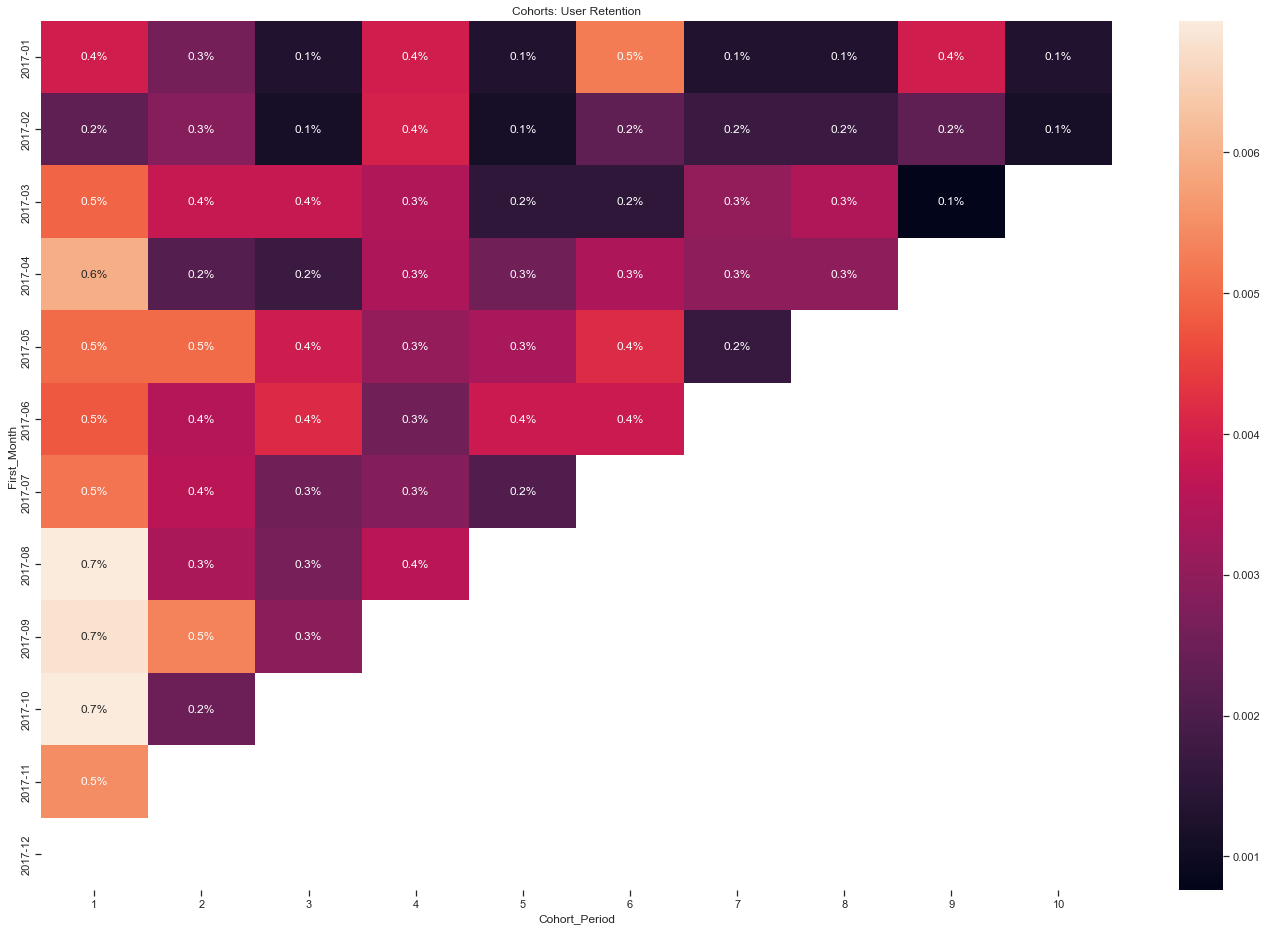

In [43]:
sns.set(style='ticks')
plt.figure(figsize=(24, 16))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.1%');

Исходя из heatmap самый высокий retention на 3 месяц у когорты пользователей, сделавших свою первую покупку в июне 2017 года, так же можно заметить что retention в первый месяц имел значительный рост с августа 2017 года.

### 6. RFM-сегментация пользователей. R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров.

Проверим может ли одно наименование товара встречаться в заказе несколько раз?

In [44]:
olist_order_items_dataset.groupby(['order_id', 'product_id']).agg({'seller_id':'count'}).sort_values('seller_id', ascending=False).head()

,,seller_id
order_id,product_id,
1b15974a0141d54e36626dca3fdc731a,ee3d532c8a438679776d222e997606b3,20
ab14fdcfbe524636d65ee38360e22ce8,9571759451b1d780ee7c15012ea109d4,20
428a2f660dc84138d969ccd69a0ab6d5,89b190a046022486c635022524a974a8,15
9ef13efd6949e4573a18964dd1bbe7f5,37eb69aca8718e843d897aa7b82f462d,15
73c8ab38f07dc94389065f7eba4f297a,422879e10f46682990de24d770e7f83d,14


Значит в одном заказе может встречаться до 20 товаров одного наименования

In [45]:
#Подготовим датафрейм для анализа
#Фильтруем только доставленные заказы
delivered_orders = olist_orders_dataset[(olist_orders_dataset['order_status'] == 'delivered')]
#Объединяем таблицы чтобы получить необходимые данные
rfm = delivered_orders.merge(olist_customers_datase, how= 'left', on='customer_id')
rfm = rfm.merge(olist_order_items_dataset, how='left', on='order_id')
# Оставляем только необходимые поля
rfm = rfm[['order_id', 'customer_unique_id', 'order_purchase_timestamp', 'product_id', 'price']]

In [46]:
rfm.head()

,order_id,customer_unique_id,order_purchase_timestamp,product_id,price
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,aa4383b373c6aca5d8797843e5594415,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,d0b61bfb1de832b15ba9d266ca96e5b0,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39,65266b2da20d04dbe00c5c2d3bb7859e,19.90


In [47]:
from datetime import datetime, timedelta
#В качестве времени для отсчета примем дату последней покупки плюс один день
NOW = rfm['order_purchase_timestamp'].max() + timedelta(days=1)
RFM_table = rfm.groupby(['customer_unique_id'])\
    .agg({ 
        #Количество дней от самого позднего заказа
        'order_purchase_timestamp': lambda x: (NOW - x.max()).days, 
        #Количество заказов за весь период
        'order_id': 'nunique', 
        #Стоимость всех заказов
        'price':'sum' 
    })\
        .rename(columns={
            'order_purchase_timestamp': 'recency',
            'order_id': 'frequency',
            'price': 'monetary'
        })

RFM_table.head()

,recency,frequency,monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90
0000f46a3911fa3c0805444483337064,537,1,69.00
0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99
0004aac84e0df4da2b147fca70cf8255,288,1,180.00


In [48]:
# Разбиваем на 5 кластеров по каждому параметру
quintiles = RFM_table[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 92.0, 0.4: 177.0, 0.6: 268.0, 0.8: 382.0},
 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

In [49]:
#Определяем номер сегмента по Recency, frequency, monetary
def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5
RFM_table['R'] = RFM_table['recency'].apply(lambda x: r_score(x))
RFM_table['F'] = RFM_table['frequency'].apply(lambda x: fm_score(x, 'frequency'))
RFM_table['M'] = RFM_table['monetary'].apply(lambda x: fm_score(x, 'monetary'))
RFM_table['RFM_Score'] = RFM_table['R'].map(str) + RFM_table['F'].map(str) + RFM_table['M'].map(str)
RFM_table.head()

,recency,frequency,monetary,R,F,M,RFM_Score
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,4,1,4,414
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,4,1,1,411
0000f46a3911fa3c0805444483337064,537,1,69.00,1,1,2,112
0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,2,1,1,211
0004aac84e0df4da2b147fca70cf8255,288,1,180.00,2,1,5,215


In [50]:
RFM_table.frequency.value_counts()

1     90557
2      2573
3       181
4        28
5         9
6         5
7         3
9         1
15        1
Name: frequency, dtype: int64

In [51]:
RFM_table.F.value_counts()

1    90557
5     2801
Name: F, dtype: int64

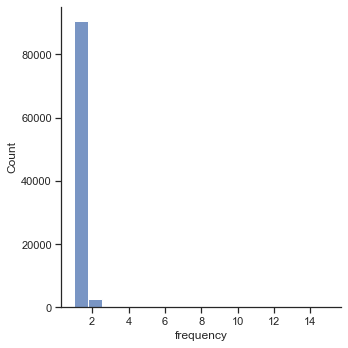

In [52]:
sns.displot(data = RFM_table, x = RFM_table.frequency)

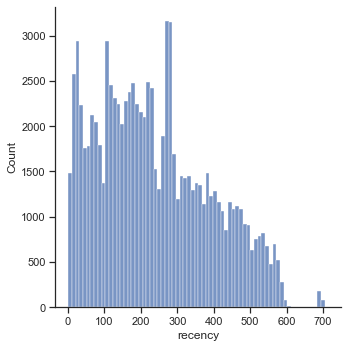

In [53]:
sns.displot(data = RFM_table, x = RFM_table.recency)

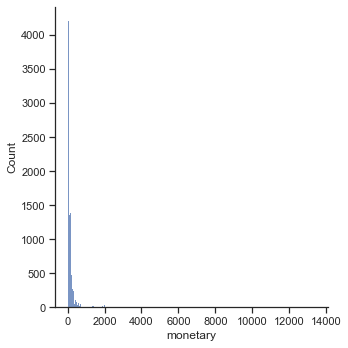

In [54]:
sns.displot(data = RFM_table, x = RFM_table.monetary)

Из распределения по частоте видно, что почти все пользователи совершили только одну покупку. В связи с этим все пользователи по частоте распределяются на два сегмента: купившие что-то только один раз и совершившие несколько покупок

In [55]:
# Пользователи с низкими показателями продаж
RFM_table[RFM_table['RFM_Score']=='111'].sort_values('recency',ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM_Score
customer_unique_id,,,,,,,
14359ea0c7a105749c0a56478825b015,695,1,32.49,1,1,1,111
2f64e403852e6893ae37485d5fcacdaf,695,1,21.90,1,1,1,111
61db744d2f835035a5625b59350c6b63,695,1,36.49,1,1,1,111
87776adb449c551e74c13fc34f036105,695,1,29.99,1,1,1,111
3f4f614c632af7fc7508462a7cb55ac2,695,1,9.90,1,1,1,111


In [56]:
#Лояльные клиенты с высокой частотой покупок и максимальной монетарностью
RFM_table[RFM_table['F'] >= 3 ].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM_Score
customer_unique_id,,,,,,,
da122df9eeddfedc1dc1f5349a1a690c,515,2,7388.00,1,5,5,155
c8460e4251689ba205045f3ea17884a1,22,4,4080.00,5,5,5,555
59d66d72939bc9497e19d89c61a96d5f,384,2,3459.00,1,5,5,155
d77aa95864ae5b42160937615628723a,365,2,2400.00,2,5,5,255
7b0eaf68a16e4808e5388c67345033c9,103,2,2238.42,4,5,5,455


In [57]:
#Лучшие клиенты с максимальным показателем по всем параметрам
RFM_table[RFM_table['RFM_Score']=='555'].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM_Score
customer_unique_id,,,,,,,
c8460e4251689ba205045f3ea17884a1,22,4,4080.00,5,5,5,555
906a8a4ec9f3d4c3e64fa6d1c4fe6009,41,2,1835.00,5,5,5,555
0341bbd5c969923a0f801b9e2d10a7b8,92,2,1828.44,5,5,5,555
4facc2e6fbc2bffab2fea92d2b4aa7e4,16,4,1686.90,5,5,5,555
525cda9909aa001ebed396f6e55eae01,22,2,1684.29,5,5,5,555


In [58]:
segt_map = {
    r'[1-2]1': 'hibernating', #Пользователи, сделавшие одну покупку и давно
    r'[1-2]5': 'can\'t loose', #Пользователи, сделавшие несколько покупок, но давно
    r'31': 'about to sleep', #Пользователи сделавшие одну покупку не очень давно, но врячдли сделают еще покупки
    r'[3-4]5': 'loyal customers', #Лояльные пользователи, сделавшие несколько покупок и относительно недавно
    r'41': 'promising', #Пользователи, сделавшие одну покупку недавно, возможно еще сделают покупки
    r'51': 'new customers', #Пользователи, которые только пришли и совершили покупку
    r'5[4-5]': 'champions' #Лучшие пользователи. Совершили несколько покупок и продолжают покупать
}

RFM_table['Segment'] = RFM_table['R'].map(str) + RFM_table['F'].map(str)
RFM_table['Segment'] = RFM_table['Segment'].replace(segt_map, regex=True)
RFM_table.head()

,recency,frequency,monetary,R,F,M,RFM_Score,Segment
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,4,1,4,414,promising
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,4,1,1,411,promising
0000f46a3911fa3c0805444483337064,537,1,69.00,1,1,2,112,hibernating
0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,2,1,1,211,hibernating
0004aac84e0df4da2b147fca70cf8255,288,1,180.00,2,1,5,215,hibernating


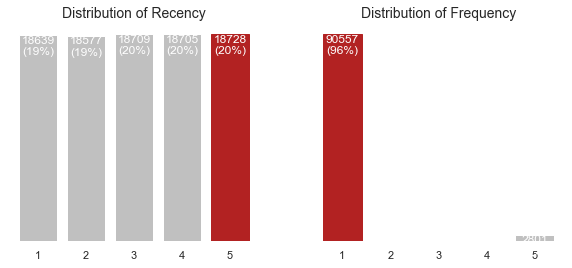

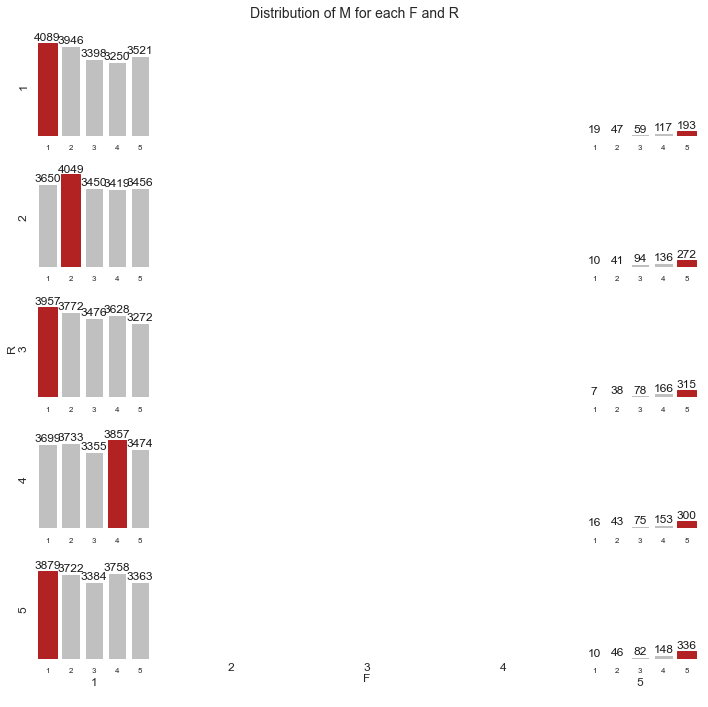

In [59]:
#График распределения пользователей по R и F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = RFM_table[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

#График распределения M для RF  
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        if(RFM_table[RFM_table['F'] == f].count == 0): 
            continue
        y = RFM_table[(RFM_table['R'] == r) & (RFM_table['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

Как мы видим из графика, основная часть пользователей, примерно 97%, делает покупку лишь один раз. И совсем небольшей количество совершает повторные покупки. При этом мы видим что те пользователи, котрые совершают повторные покупки тратят в основном больше, чем пользователи, совершившие по 1 покупке.

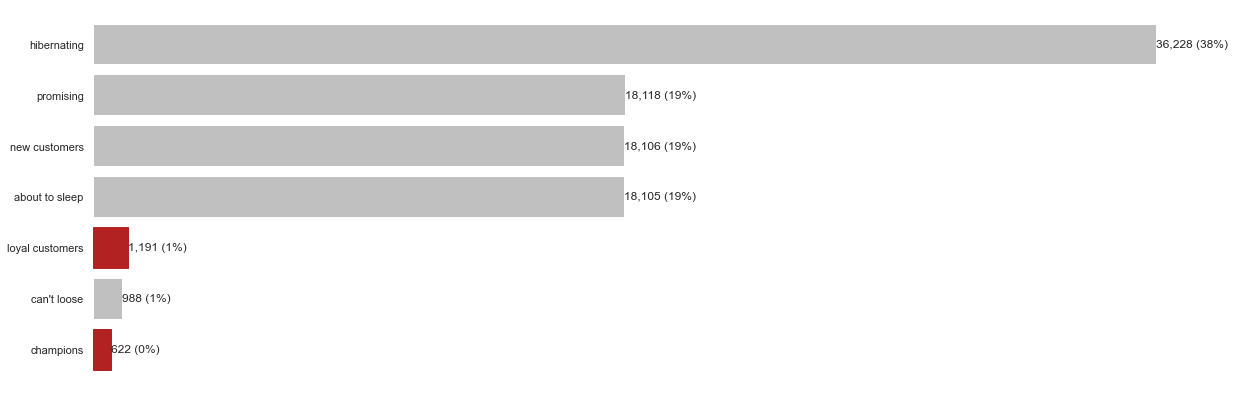

In [60]:
# Количество пользователей в каждом сегменте
segments_counts = RFM_table['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

Из данного графика мы видим, что лояльных пользователей очень мало (около 2%). Подавляющая часть пользователей совершила только один заказ. RFM сегментация показала разделение на две несбалансированные группы, в следствие чего оказалась не очень показательной.